In [1]:
%load_ext autoreload
%autoreload 2

In [6]:
from europePMC_wrapper import *
import pandas as pd
import pickle

from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

import scispacy
import spacy 

#### Acesss Europe PMC API

In [3]:
papers_tuberculosis = pmc_to_papers('tuberculosis')

getting papers


In [4]:
papers_mtb = pmc_to_papers('Mycobacterium tuberculosis')

getting papers


In [5]:
papers_targets = pmc_to_papers('targets')

getting papers


In [6]:
len(papers_tuberculosis)

10311

In [54]:
len (papers_targets)

44772

In [55]:
len (papers_)

3151

In [112]:
papers_tuberculosis[0].annotations

{'Diseases': [], 'Chemicals': [], 'Gene_Proteins': [], 'Organisms': []}

In [7]:
papers_tuberculosis = get_annotations_paper_instances(papers_tuberculosis)

KeyboardInterrupt: 

In [ ]:
with ('tb_papers_annotated.pkl', 'wb') as f:
    pickle.dump(papers_tuberculosis, f)

In [ ]:
papers_mtb = get_annotations_paper_instances(papers_mtb)

with ('mtb_papers_annotated.pkl', 'wb') as f:
    pickle.dump(papers_mtb, f)

In [ ]:
papers_targets = get_annotations_paper_instances(papers_targets)

with ('targets_papers_annotated.pkl', 'wb') as f:
    pickle.dump(papers_targets, f)

In [ ]:
papers_tuberculosis[0].annotations

In [ ]:
with ('targets_papers_annotated.pkl', 'rb') as f:
    papers_targets = pickle.load(f)

In [115]:
papers_tuberculosis[1].annotations['Diseases']

['tuberculosis',
 'drug-resistant tuberculosis',
 'curb',
 'clinical resistance',
 'cross-resistance',
 'bacterial resistance',
 'mitochondrial toxicity']

In [24]:
papers_tuberculosis[0].annotations

{'Diseases': ['tuberculosis',
  'infectious disease',
  'infects',
  'infection',
  'infections',
  'malaria',
  'primary tuberculosis',
  'cancer',
  'diabetes',
  'kidney failure',
  'coinfections',
  'induration',
  'granuloma',
  'active tuberculosis',
  'immunodeficiency',
  'infect',
  'latent infection',
  'pulmonary tuberculosis'],
 'Chemicals': ['rifampicin',
  'rifampin',
  'isoniazid',
  'pyrazinamide',
  'ethambutol',
  'lipids',
  'glycolipids',
  'glycans',
  'mycolic acids',
  'arabinogalactan',
  'lipoarabinomannan',
  'lipopolysaccharide',
  'lipid',
  'glycan',
  'sulfolipid',
  'trehalose',
  'phosphatidyl',
  'inositol',
  'mannan',
  'glucan',
  'mycolic acid',
  'long chain fatty acids',
  'trehalose dimycolate',
  'sulfolipid-1',
  'glycolipid',
  'phthiocerol',
  'trehalose monomycolate',
  'disaccharide',
  'ester',
  'cord factor',
  'polyphosphate',
  'polyketide',
  'trehaloses',
  'nitric oxide',
  'acyl trehaloses',
  'sulfolipids',
  'acyl trehalose',
  '

In [12]:
data = {'id':[], 'title':[], 'abstract':[], 'title_abstract':[], 'keyword':[]}

for paper in papers_tuberculosis:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)


In [13]:
for paper in papers_mtb:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)


In [14]:
for paper in papers_targets:
    data['id'].append(paper.id)
    data['title'].append(paper.title)
    data['abstract'].append(paper.abstract)
    data['title_abstract'].append(paper.title_abstract)
    data['keyword'].append(paper.query_keyword)


NameError: name 'papers_targets' is not defined

In [15]:
df = pd.DataFrame(data=data)

In [16]:
df

,id,title,abstract,title_abstract,keyword
0,36419223,Pathogenicity and virulence of <i>Mycobacteriu...,<i>Mycobacterium tuberculosis</i> (Mtb) is the...,Pathogenicity and virulence of <i>Mycobacteriu...,tuberculosis
1,36752055,Designing molecular diagnostics for current tu...,Diagnostic development must occur in parallel ...,Designing molecular diagnostics for current tu...,tuberculosis
2,37138657,Intraperitoneal tuberculosis abscess: A rare f...,Tuberculosis is related to high rate of morbid...,Intraperitoneal tuberculosis abscess: A rare f...,tuberculosis
3,37143459,Like a shot-through manubrium: A rare presenta...,A 22-year-old Vietnamese woman presented with ...,Like a shot-through manubrium: A rare presenta...,tuberculosis
4,36994220,Tuberculosis of navicular bone: An exceptional...,Osteoarticular tuberculosis (OAT) is defined b...,Tuberculosis of navicular bone: An exceptional...,tuberculosis
...,...,...,...,...,...
13469,27605387,GenoType<sup>®</sup> MTBDRsl assay for resista...,<h4>Background</h4>Genotype® MTBDRsl (MTBDRsl)...,GenoType<sup>®</sup> MTBDRsl assay for resista...,Mycobacterium tuberculosis
13470,10986230,Functional organization and insertion specific...,A search by subtractive hybridization for sequ...,Functional organization and insertion specific...,Mycobacterium tuberculosis
13471,10858194,Tuberculosis DNA vaccine encoding Ag85A is imm...,Immunogenicity and protective efficacy of a DN...,Tuberculosis DNA vaccine encoding Ag85A is imm...,Mycobacterium tuberculosis
13472,9874655,Differentiation between Mycobacterium bovis BC...,Tuberculosis continues to be a worldwide probl...,Differentiation between Mycobacterium bovis BC...,Mycobacterium tuberculosis


In [50]:
df.to_csv('dataframe_papers.csv')

In [38]:
df = pd.read_csv('dataframe_papers.csv', sep=',', index_col=0)

In [37]:
%matplotlib inline

#### Scispacy annotation

In [ ]:
nlp = spacy.load("en_ner_bc5cdr_md")


In [23]:
#from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
#color_palette('sns_colorblind').plot()

In [24]:
#corpus_visualization(train_dataanalysis_df_wsw, dim_red='tsne', feature_ext='bow', random_state=123123)

In [25]:
#plt.rcParams['figure.figsize'] = [20,10]
#corpus_visualization(train_dataanalysis_df_wsw, dim_red='tsne', feature_ext='tfidf', random_state=123123, decompose_byint=50, file_name='tdataframe_papers.csv')
                

In [26]:
#x = color_palette('sns_colorblind')

In [28]:
#from yellowbrick.style.palettes import PALETTES, SEQUENCES, color_palette
#color_palette('sns_colorblind').plot()

In [ ]:
df.title_abstract.values.tolist()

In [ ]:
def generate_wordcloud(title_abstract):
    text = " ".join(title_abstract.values.tolist())
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    %matplotlib inline
    plt.show()

In [134]:
tuberculosis_df = df[df['keyword'] == 'tuberculosis']
mtb_df = df[df['keyword'] == 'Mycobacterium tuberculosis']
targets_df = df[df['keyword'] == 'targets']

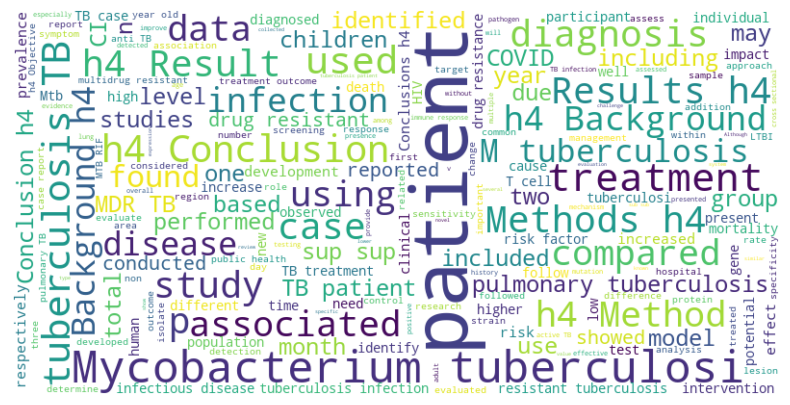

In [39]:
generate_wordcloud(tuberculosis_df.title_abstract)

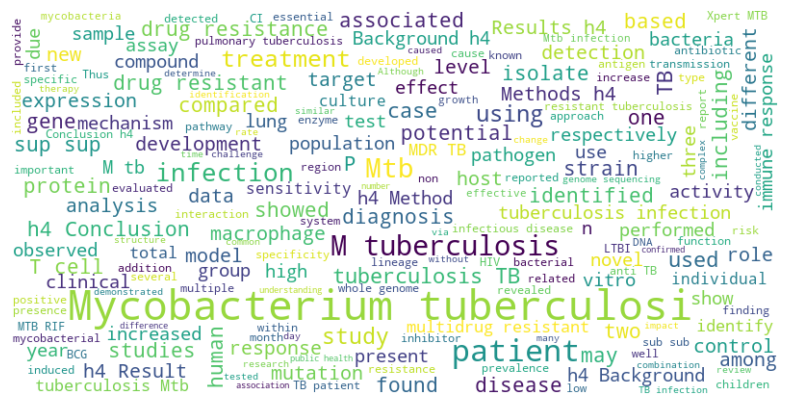

In [136]:
generate_wordcloud(mtb_df.title_abstract)

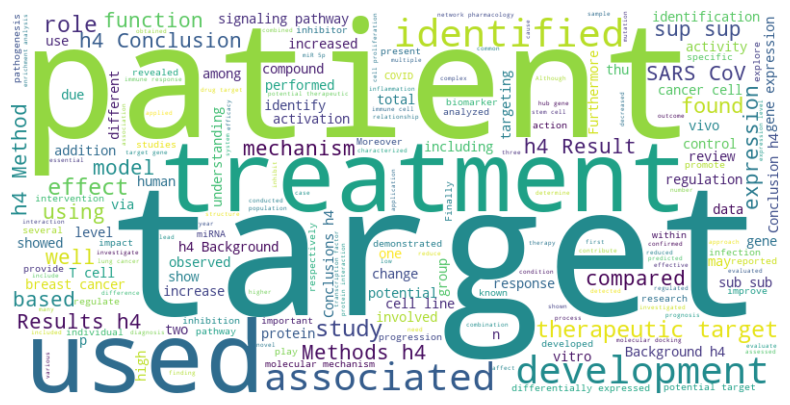

In [138]:
generate_wordcloud(targets_df.title_abstract)

In [20]:
import seaborn as sns
p = sns.color_palette('colorblind')

In [21]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer

In [28]:
from sympy import Interval

# Create an interval from 1 to 5 (including both endpoints)
my_interval = Interval(1, 5)

In [23]:
!pip install -U scikit-learn

In [29]:
from numpy import unique
from numpy import where
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from matplotlib import pyplot

In [39]:
data=df

In [61]:
 vectorizer = TfidfVectorizer()
 X = vectorizer.fit_transform(data['title_abstract'])

In [ ]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(df_encoded)

In [73]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar os dados em um DataFrame
df = pd.read_csv('dataframe_papers.csv')

# Remover linhas com valores NaN
df = df.dropna()

# Converter colunas com valores não numéricos para NaN
df = df.apply(pd.to_numeric, errors='coerce')

# Remover colunas com valores NaN
df = df.dropna(axis=1)

# Pré-processamento dos dados (normalização)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Executar o algoritmo K-means
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(scaled_data)
cluster_labels = kmeans.labels_

# Redução de dimensionalidade usando PCA
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Plotar os dados com cores diferentes para cada cluster
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=cluster_labels)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Clusters Identificados pelo K-means')
plt.show()


C:\Users\catarina\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


AttributeError: 'NoneType' object has no attribute 'split'

In [37]:
#data['cluster'] = kmeans.labels_

In [41]:
print(data)

             id                                              title  \
0      36419223  Pathogenicity and virulence of <i>Mycobacteriu...   
1      36752055  Designing molecular diagnostics for current tu...   
2      37138657  Intraperitoneal tuberculosis abscess: A rare f...   
3      36594409  Prevalence of covid-19 among patients with chr...   
4      37235072  Association of Single-Nucleotide Polymorphisms...   
...         ...                                                ...   
58203    444403  Microenvironmental arginine depletion by macro...   
58204   6968570  Factors affecting stimulation of natural cytot...   
58205    215185  Significance of the proline assay in the study...   
58206    205233  Cytotoxic effects of hexavalent and trivalent ...   
58207    181040  Tumour rejection in rats sensitized to embryon...   

                                                abstract  \
0      <i>Mycobacterium tuberculosis</i> (Mtb) is the...   
1      Diagnostic development must occu

In [56]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [58]:
import os
os.environ["OMP_NUM_THREADS"] = "2" 


In [59]:
documents = data["title_abstract"].tolist()

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(documents)

n_clusters = 3

kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(X)

cluster_labels = kmeans.labels_

tsne = TSNE(n_components=2, random_state=42)

# Execute a redução de dimensionalidade
X_tsne = tsne.fit_transform(X)

# Plote os dados reduzidos em um gráfico de dispersão
plt.scatter(X_tsne[:, 0], X_tsne[:, 1])
plt.show()

plt.figure(figsize=(10, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=cluster_labels, cmap="viridis")
plt.title("Similaridade entre os artigos")
plt.xlabel("Dimensão 1")
plt.ylabel("Dimensão 2")
plt.colorbar(label="Cluster")
plt.show()

AttributeError: 'NoneType' object has no attribute 'split'